In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
df = pd.read_csv('heart.csv')

## Pre

### EDA

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
fig = go.Figure(data=[
                      go.Bar(name = 'mulhé', x = df['sex'], y = df.target[df['sex'] == 1]),
                      go.Bar(name = 'homi', x = df['sex'], y = df.target[df['sex'] == 0])
])

In [5]:
fig.update_layout(barmode = 'group',
                  autosize = False,
                  height = 500,
                  width = 500,
                  paper_bgcolor="LightSteelBlue")
fig.show()

In [6]:
import plotly.express as px
fig = px.histogram(df, x = 'age', y = 'target', color = 'sex',
                   marginal = 'box', 
                   nbins = 70,
                   hover_data = df.columns)
fig.show()

In [7]:
fig = px.scatter(df, x = 'chol', y = 'trestbps', facet_col = 'target', color = 'thalach')
fig.show()

In [8]:
import plotly.figure_factory as ff

group_labels = ['distplot']

fig = ff.create_distplot([df['oldpeak']], group_labels)
fig.show()

In [9]:
fig = px.density_contour(df, x = 'chol', y = 'age', color = 'target', marginal_x = 'histogram', marginal_y = 'violin')
fig.show()

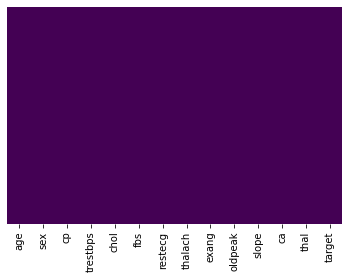

In [10]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Dummies

In [0]:
df['sex'] = df['sex'].replace(to_replace = '0', value = 'male')
df['sex'] = df['sex'].replace(to_replace = '1', value = 'female')
cp = pd.get_dummies(df['cp'], prefix = 'cp', drop_first = True)
thal = pd.get_dummies(df['thal'], prefix = 'thal', drop_first = True)
slope = pd.get_dummies(df['slope'], prefix = 'slope', drop_first = True)
conc = [cp, thal, slope, df]

In [0]:
df = pd.concat(conc, axis = 1)

In [0]:
df.drop(columns = ['cp', 'thal', 'slope'], inplace = True)

In [14]:
df.head()

cp_1  cp_2  cp_3  thal_1  thal_2  ...  thalach  exang  oldpeak  ca  target
0     0     0     1       1       0  ...      150      0      2.3   0       1
1     0     1     0       0       1  ...      187      0      3.5   0       1
2     1     0     0       0       1  ...      172      0      1.4   0       1
3     1     0     0       0       1  ...      178      0      0.8   0       1
4     0     0     0       0       1  ...      163      1      0.6   0       1

[5 rows x 19 columns]

### Norm

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('target', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled = scaler.transform(df.drop('target', axis = 1))

In [0]:
X_norm = pd.DataFrame(scaled, columns = df.columns[:-1])

### Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop(columns = 'target')
y = df['target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
Xn_train, Xn_test, y_train, y_test = train_test_split(X_norm, y, test_size = .3)

## SKlearn Classification Algorithms

In [24]:
acc = []
conf = {}
report = {}
ac = {}
acc

[]

### Logistic Reg

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [27]:
lr.fit(Xn_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = lr.predict(Xn_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
conf_lr = confusion_matrix(y_test, predictions)
report_lr = classification_report(y_test, predictions)
acc_lr = (lr.score(Xn_test, y_test))
acc.append(acc_lr)
print(acc)

[0.8351648351648352]


In [0]:
ac.update( {'acc_lr' : acc_lr})

### KNN -- rever -- 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
error_rate = []

for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xn_train, y_train)
  pred_i = knn.predict(Xn_test)
  error_rate.append(np.mean(pred_i != y_test))

In [0]:
score_rate = []

for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xn_train, y_train)
  score_rate.append(knn.score(Xn_test, y_test))

In [0]:
score = np.array(score_rate)
error = np.array(error_rate)
x = np.array(range(1,30))
dif = score - error
best_k = np.argmax(dif, axis = 0)

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = error,
                         mode = 'lines+markers',
                         name = 'error rate'))
fig.add_trace(go.Scatter(x = x, y = score,
                         mode = 'lines+markers',
                         name = 'score rate'))
fig.add_shape(
        dict(
            type="line",
            x0=best_k,
            y0=0,
            x1=best_k,
            y1=1,
            line=dict(
                color="RoyalBlue",
                width=3
            )))
fig.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors=best_k)

In [38]:
knn.fit(Xn_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [0]:
predictions = knn.predict(Xn_test)

In [0]:
conf_knn = confusion_matrix(y_test, predictions)
report_knn = classification_report(y_test, predictions)
acc_knn = knn.score(Xn_test, y_test)
acc.append(acc_knn)

In [0]:
ac.update( {'acc_knn' : acc_knn})

### SVM (with grid)

In [0]:
from sklearn.svm import SVC

In [0]:
svc = SVC()

In [44]:
svc.fit(Xn_train, y_train) ## check if it should be norm or nah -> 85% norm x 55% no norm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svc.predict(Xn_test) ## check if it should be norm or nah

In [46]:
conf_svm = confusion_matrix(y_test, predictions)
report_svm = classification_report(y_test, predictions)
print(conf_svm, report_svm)

[[32  8]
 [ 9 42]]               precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [0]:
acc_svm = (lr.score(Xn_test, y_test))
acc.append(acc_svm)


In [0]:
ac.update( {'acc_svm' : acc_svm})

#### w gridsearch

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'C': [0.01, 0.1, 1, 1.2, 1.5, 2], 'gamma': [1, .1, .01, .001]}

In [51]:
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(Xn_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 1.2, 1.5, 2],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
predictions = grid.predict(Xn_test)
conf_grid_svc = confusion_matrix(y_test, predictions)
report_grid_svc = classification_report(y_test, predictions)
print(conf_svm, report_svm)

[[32  8]
 [ 9 42]]               precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.84      0.82      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [0]:
acc_grid = (grid.score(Xn_test, y_test))
acc.append(acc_grid)

In [0]:
ac.update( {'acc_grid' : acc_grid})

### Bayes Inocente

In [0]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()
nb.fit(Xn_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictions = nb.predict(Xn_test)
conf_nb = confusion_matrix(y_test, predictions)
report_nb = classification_report(y_test, predictions)
acc_nb = (nb.score(Xn_test, y_test))
acc.append(acc_nb)

In [58]:
print(conf_nb, report_nb)

[[36  4]
 [ 9 42]]               precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.91      0.82      0.87        51

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [0]:
ac.update( {'acc_nb' : acc_nb})

### Decision Trees & Random Forest

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(Xn_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
predictions = dtree.predict(Xn_test)
conf_dtree = confusion_matrix(y_test, predictions)
report_dtree = classification_report(y_test, predictions)
print(conf_dtree, report_dtree)

[[29 11]
 [14 37]]               precision    recall  f1-score   support

           0       0.67      0.72      0.70        40
           1       0.77      0.73      0.75        51

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [0]:
acc_dtree = (dtree.score(Xn_test, y_test))
acc.append(acc_dtree)
(dtree.score(Xn_test, y_test))
ac.update( {'acc_dtree' : acc_dtree})

In [139]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(max_depth=5)
rforest.fit(Xn_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
estimator = rforest.estimators_[1]
features_names = [i for i in Xn_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [154]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [140]:
predictions = rforest.predict(Xn_test)
conf_rforest = confusion_matrix(y_test, predictions)
report_rforest = classification_report(y_test, predictions)
print(conf_rforest, report_rforest)

[[31  9]
 [10 41]]               precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.82      0.80      0.81        51

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [0]:
acc_rforest = (rforest.score(Xn_test, y_test))
acc.append(acc_rforest)
(rforest.score(Xn_test, y_test))
ac.update( {'acc_rforest' : acc_rforest})

### Comparing

In [0]:
met = []
acuracia = []
for keys, accuracy in ac.items():
  acuracia.append(accuracy)
  met.append(keys)

In [69]:
fig = go.Figure(
    data = [go.Bar(y = acuracia, x = met)],
    layout_title_text = "Acurácia de cada modelo"
    
)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_yaxes(range=[.6, .9])
fig.show()

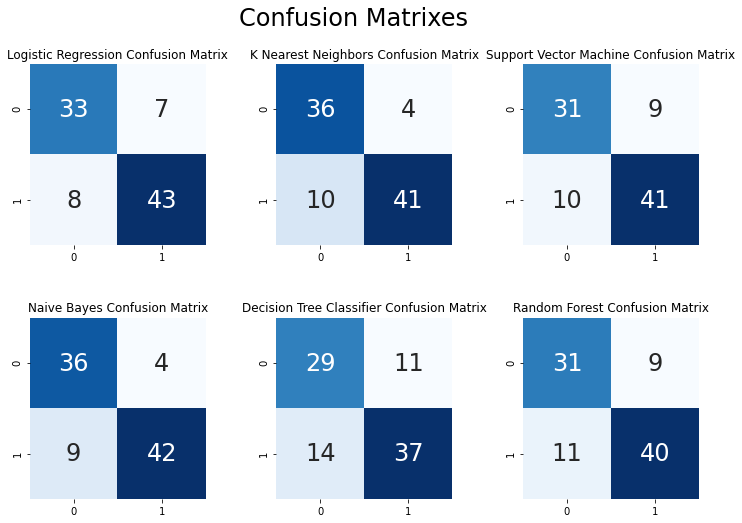

In [74]:
plt.figure(figsize=(12,8))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(conf_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(conf_grid_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(conf_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(conf_dtree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(conf_rforest,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [161]:
conf_rforest[0, 1]

9

In [0]:
def spec(conf):
  sens = (conf[0,0])/((conf[0,0]) + conf[0, 1])
  spec = (conf[1,1])/((conf[1,1]) + conf[1, 0])
  return(sens, spec)